<a href="https://colab.research.google.com/github/safdarjung/projects/blob/main/Ecommerce_Kmeans_zidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
data = pd.read_excel('/content/ecom customer_data.xlsx')
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# EDA

data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
#cleaning
'''
2724 null val in Gender
0 duplicated val
'''

df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
df.duplicated().sum()

0

In [ ]:
# filling the nan with most freq values

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df.isna().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

<Axes: ylabel='count'>

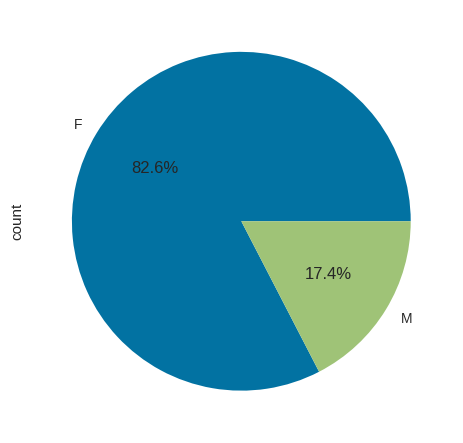

In [ ]:
#visualisation

df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='Orders', ylabel='count'>

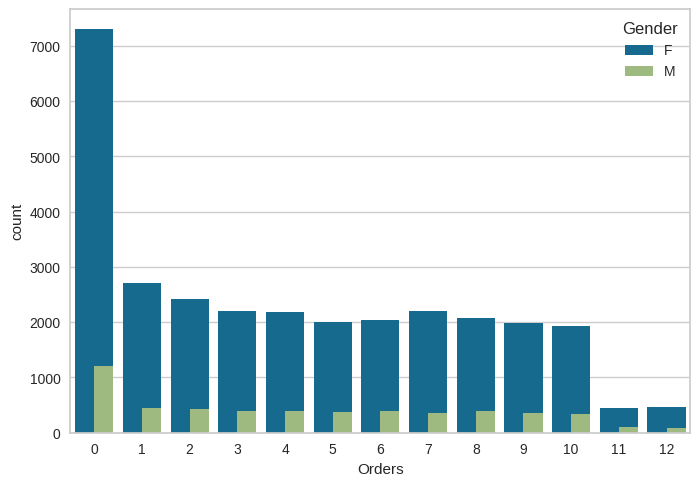

In [ ]:
sns.countplot(x='Orders', data=df)
sns.countplot(x='Orders', data=df, hue='Gender')
# gender wise overall orders

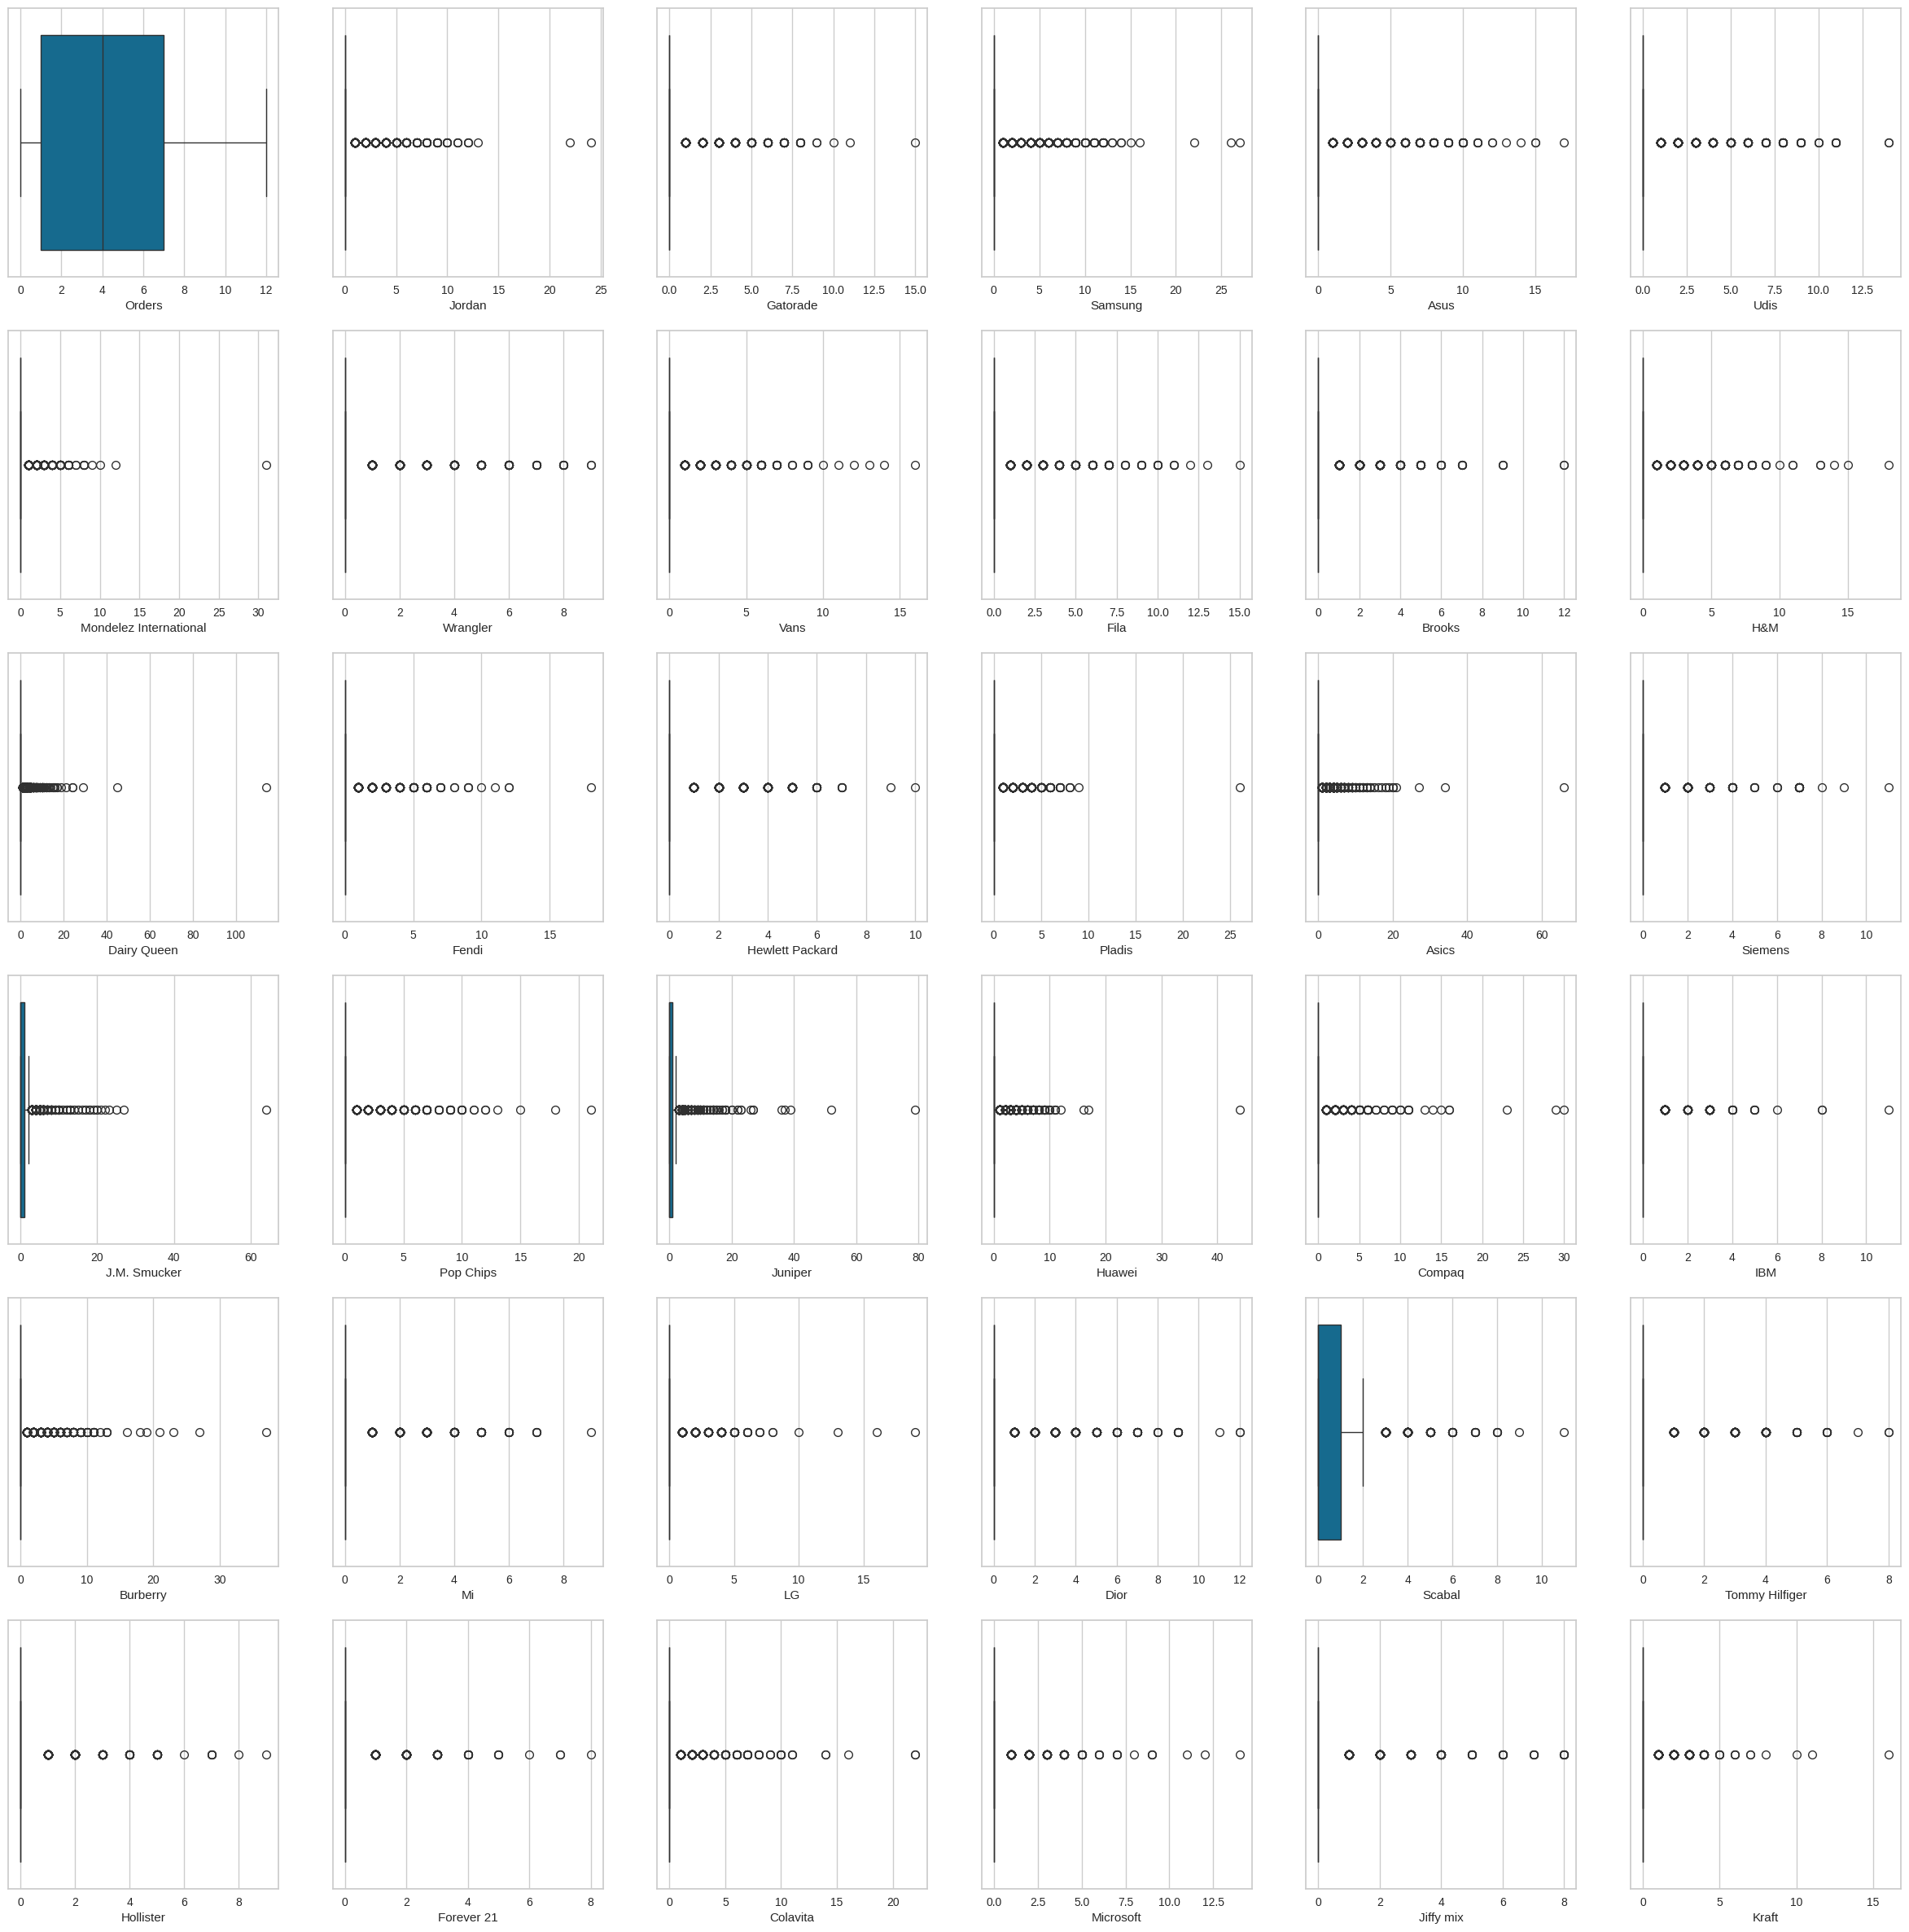

In [ ]:
# Orders and searches of each brand

cols = list(df.columns[2:])

def dist_list_boxplot(lst):
  plt.figure(figsize=(30,30))
  for i,col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(x=df[col], data=df)

dist_list_boxplot(cols)

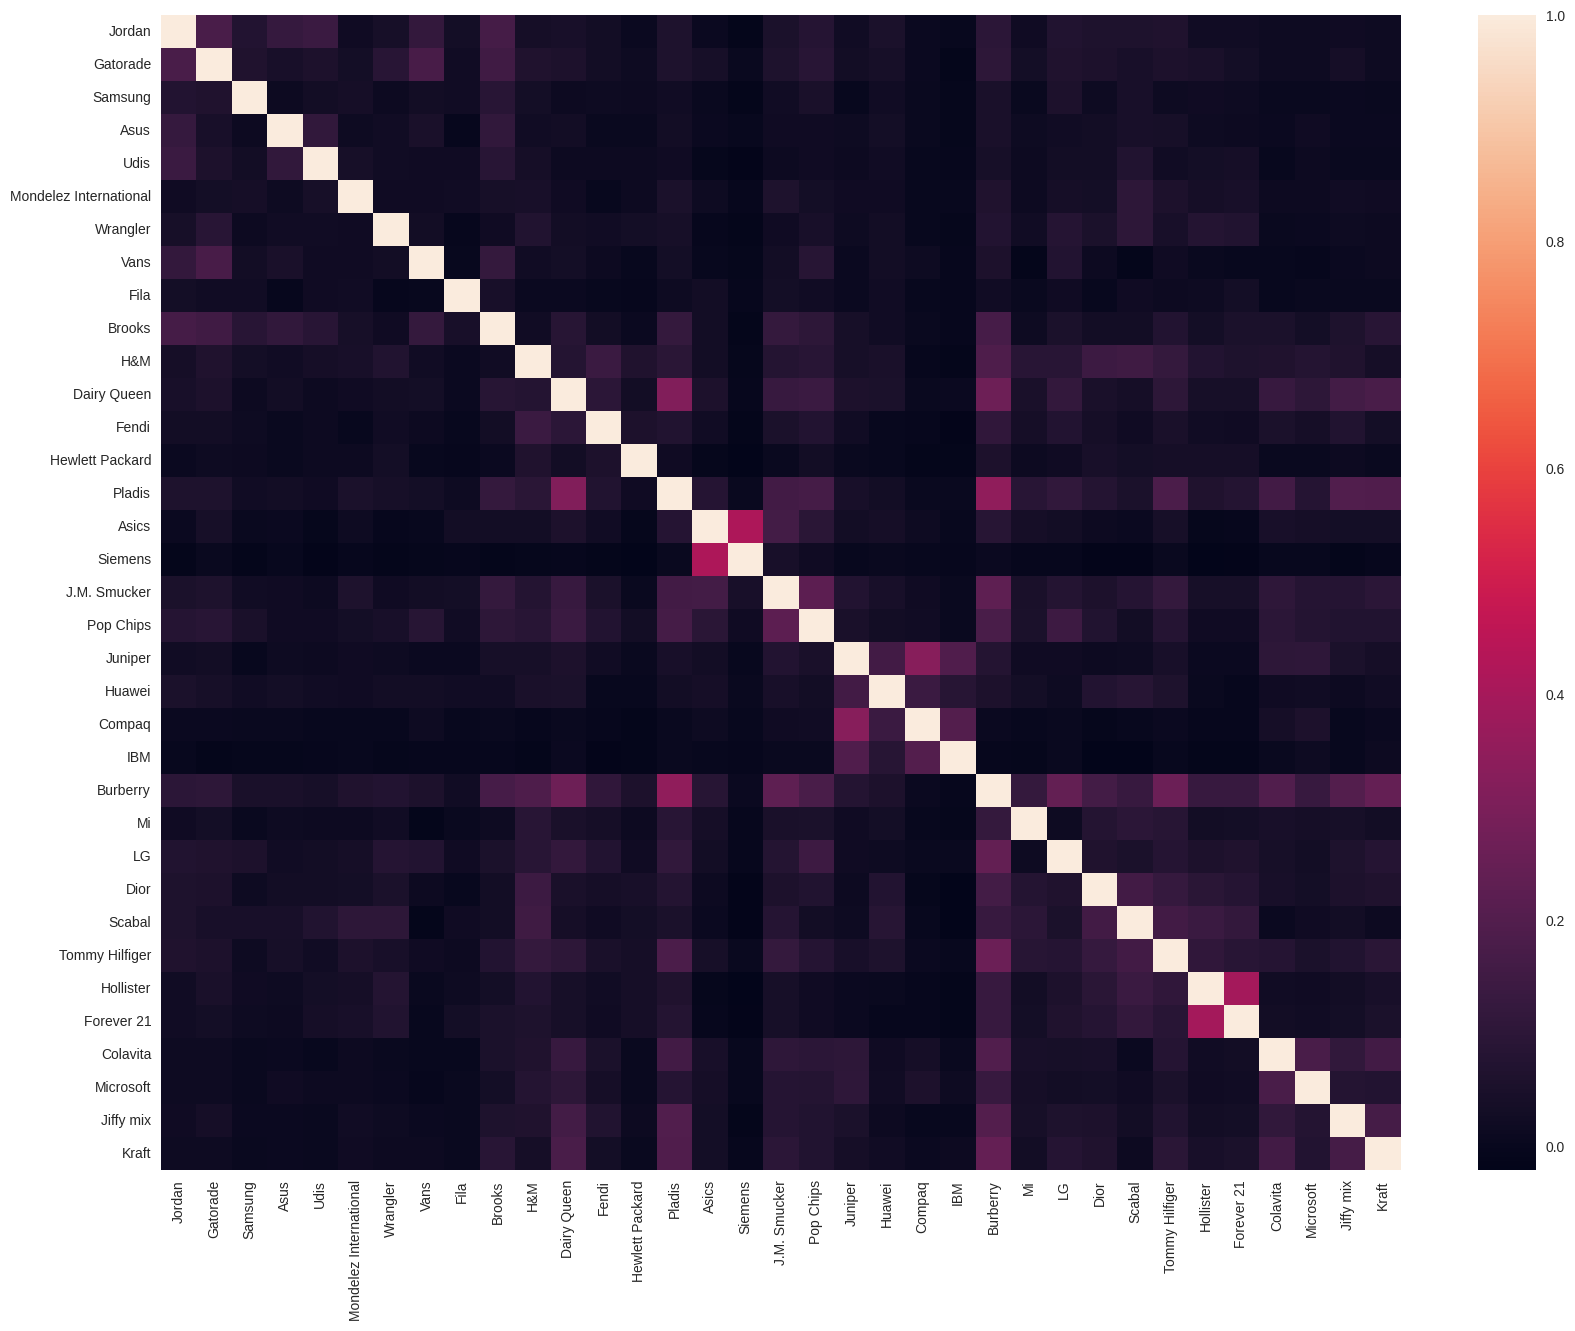

In [ ]:
# Heatmap

plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

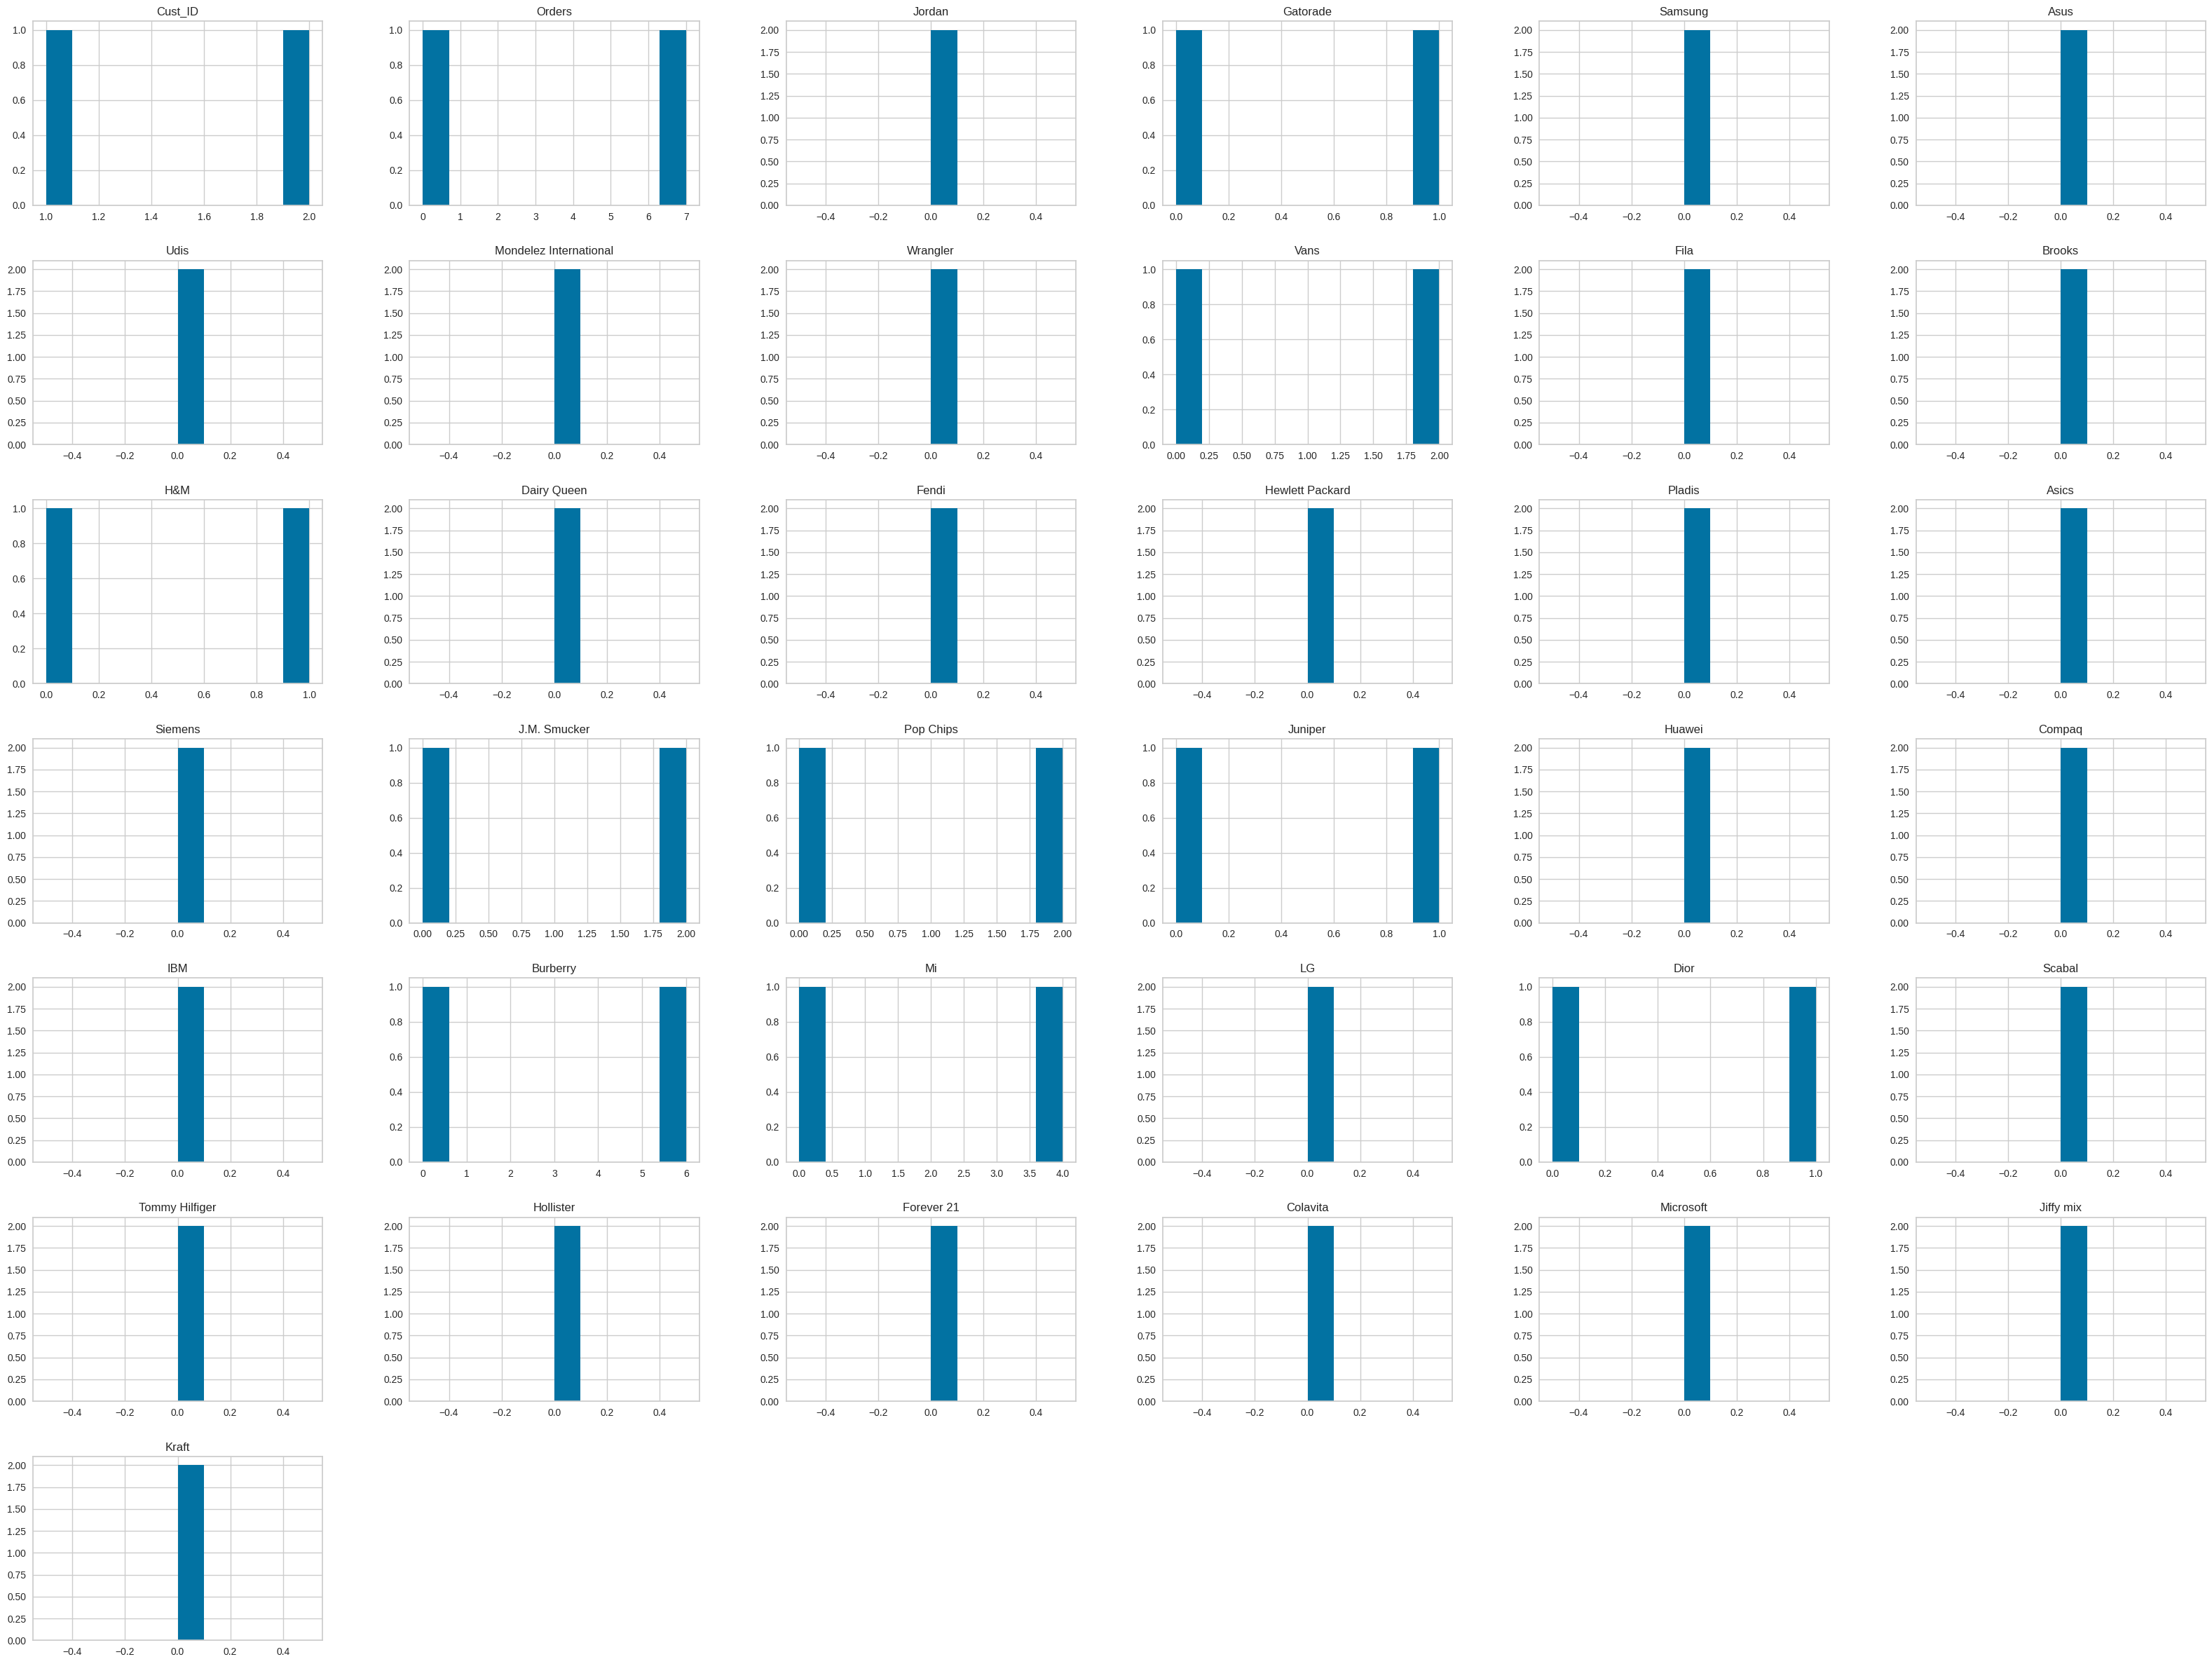

In [ ]:
df.iloc[:2,:].hist(figsize = (40,30))
plt.show()

In [ ]:
df2 = df.copy()

#total searches by every customer
df2['total_search'] = df2.iloc[:,3:].sum(axis=1)

df2

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total_search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df2.sort_values(by='total_search', ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total_search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


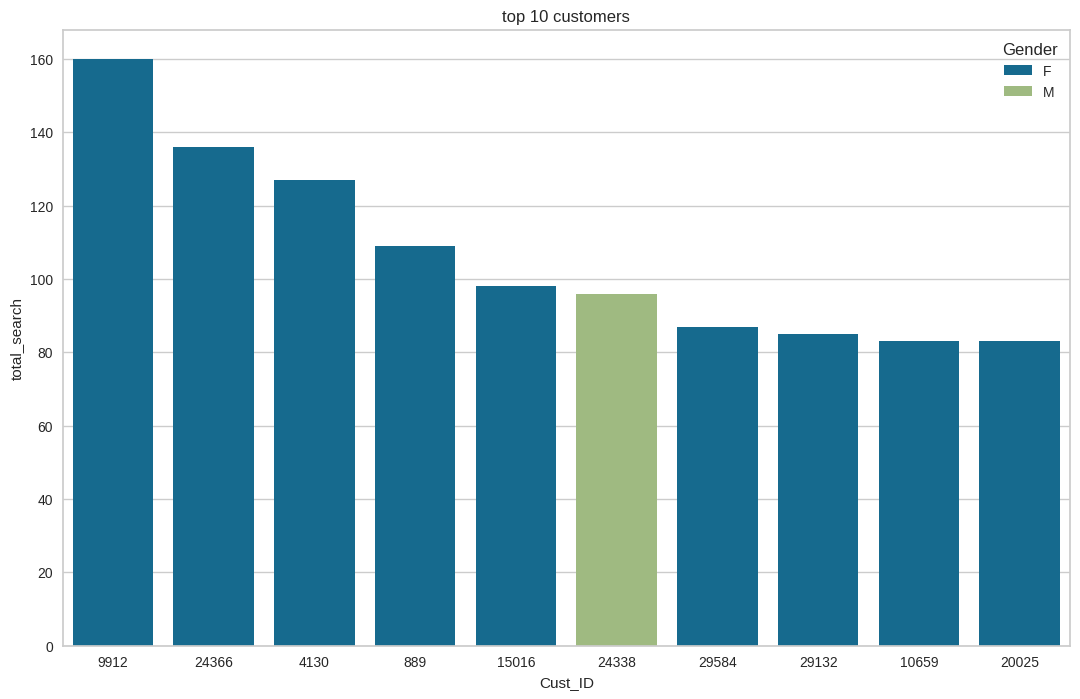

In [ ]:
plt.figure(figsize=(13,8))
plt_data = df2.sort_values(by='total_search', ascending=False)[['Cust_ID','total_search','Gender']].head(10)
sns.barplot(data=plt_data, x='Cust_ID', y='total_search', hue='Gender',order= plt_data.sort_values(by='total_search', ascending=False).Cust_ID)
plt.title('top 10 customers')
plt.show()

In [ ]:
#scaling

x= df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

In [ ]:
scale = MinMaxScaler()
features = scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Using Elbow method to find the optimal value of K

inertia = []
for i in range(1,16):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

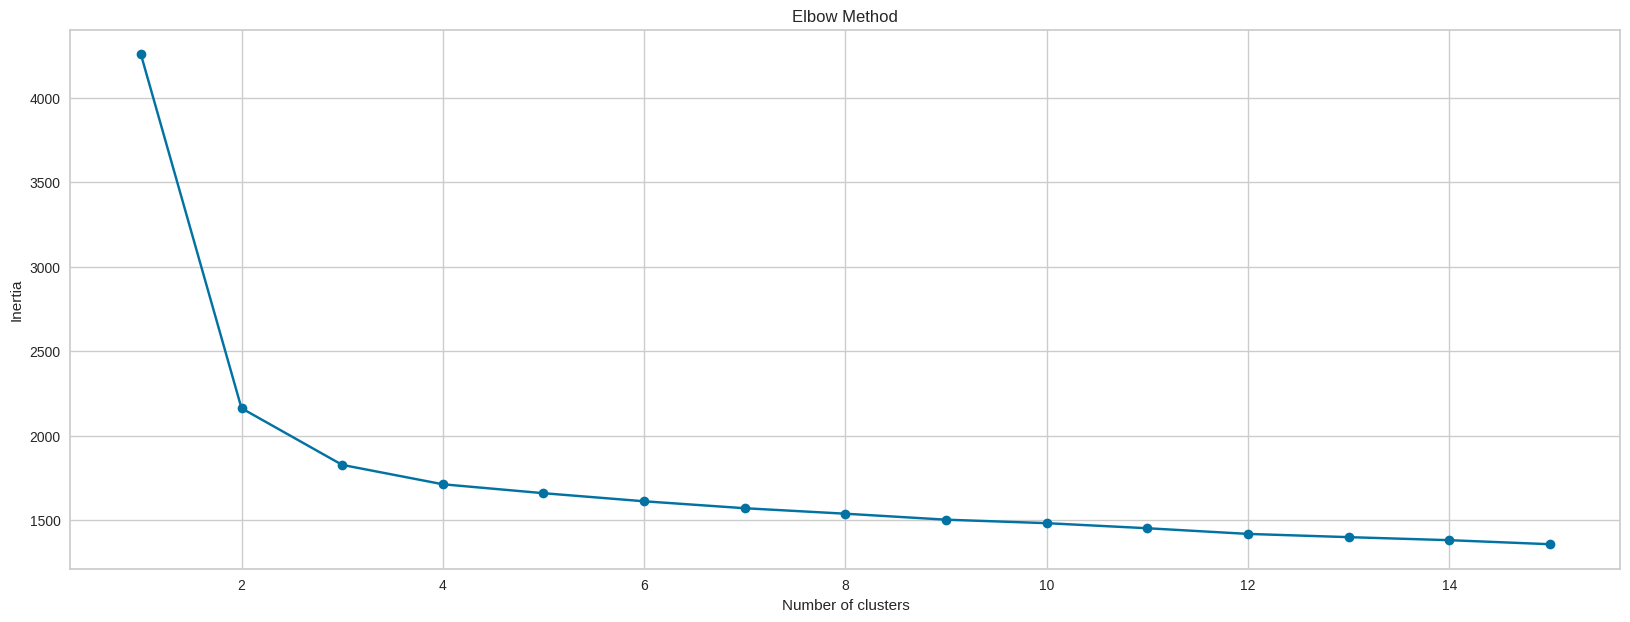

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(1,16), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

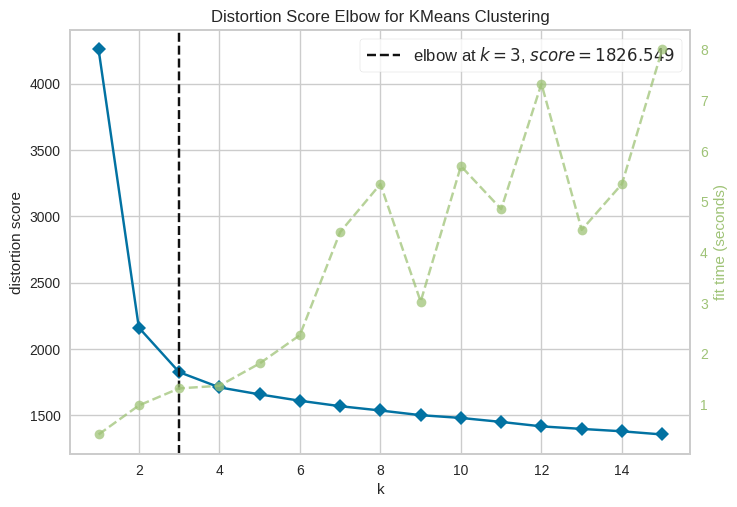

In [ ]:
#KElbow Visualiser

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,16))
visualizer.fit(features)
visualizer.poof()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

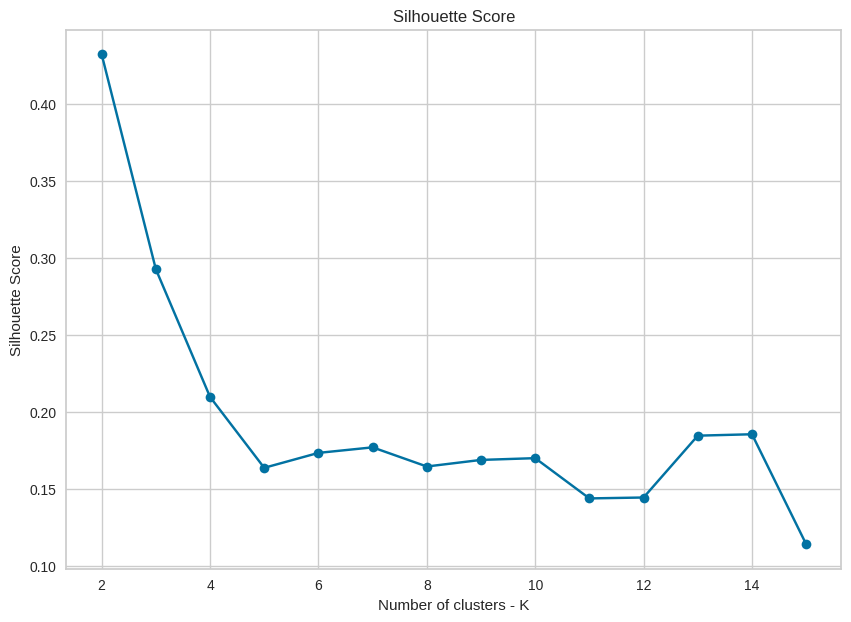

In [ ]:
# Silhouette score for each k value
# b-a/max(a,b)

sil_avg = []
for i in range(2,16):
  kmeans = KMeans(n_clusters=i, random_state=42)
  cluster_label = kmeans.fit_predict(features)
  sil_avg.append(silhouette_score(features, cluster_label))
plt.figure(figsize=(10,7))
plt.plot(range(2,16), sil_avg, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters - K')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
y_km = model.predict(features)
centers = model.cluster_centers_


In [ ]:
df['cluster'] = y_km
df.to_csv("Cluster Data", index =False)
df['cluster'].value_counts()

cluster
0    12432
1     9128
2     8440
Name: count, dtype: int64

In [ ]:
cl_df = pd.read_csv('/content/Cluster Data')
cl_df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cl_df['total_search']=cl_df.iloc[:,3:38].sum(axis=1)
cl_df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster,total_search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# analysing CLUSTER - 0

cl_0 = cl_df.groupby(['cluster','Gender'],as_index=False).sum().query('cluster==0')
cl_0

,cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total_search
0,0,F,154699357,6269,2470,1947,2086,1813,1632,1480,...,3041,4194,1807,847,654,1960,1153,870,776,70690
1,0,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787


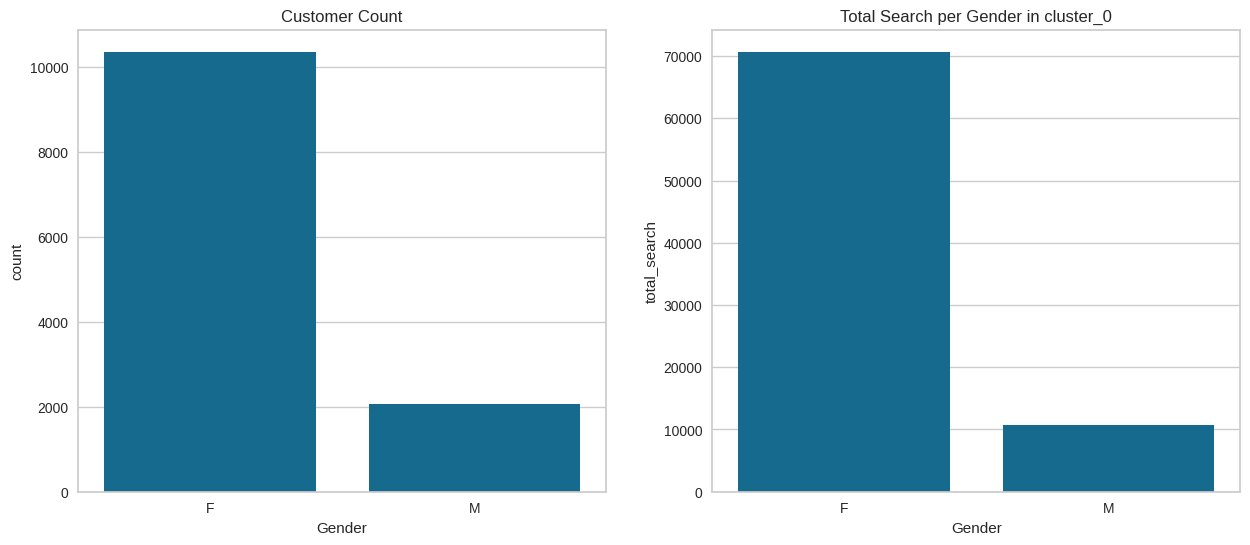

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=cl_df.query('cluster==0'),x='Gender')
plt.title('Customer Count')

plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='total_search')
plt.title('Total Search per Gender in cluster_0')
plt.show()

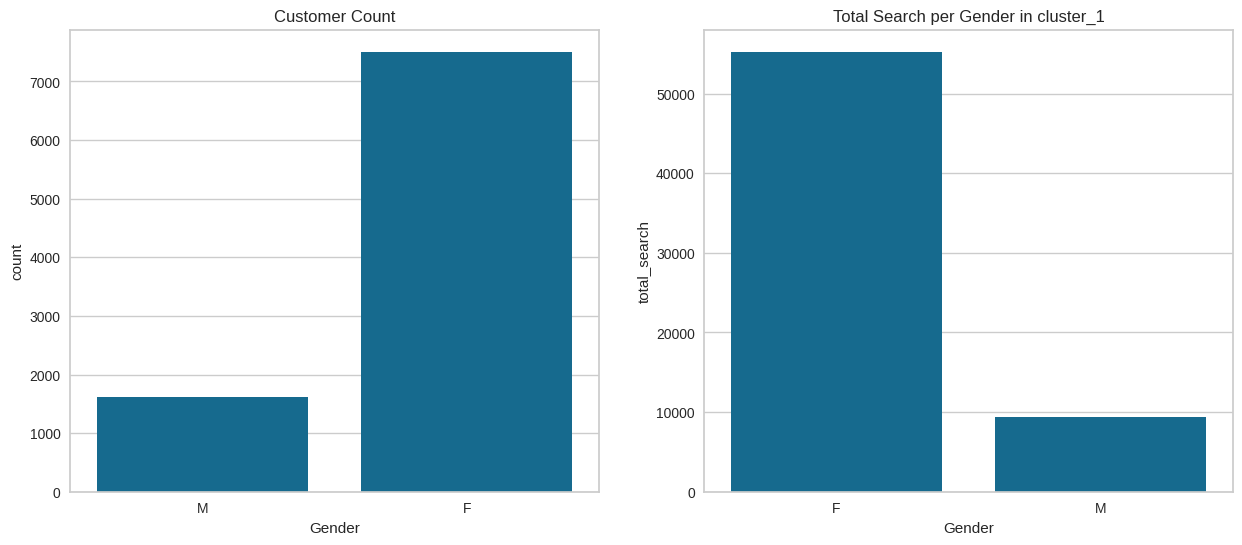

In [ ]:
# analysing CLUSTER - 1

cl_1 = cl_df.groupby(['cluster','Gender'],as_index=False).sum().query('cluster==1')

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=cl_df.query('cluster==1'),x='Gender')
plt.title('Customer Count')

plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='total_search')
plt.title('Total Search per Gender in cluster_1')
plt.show()

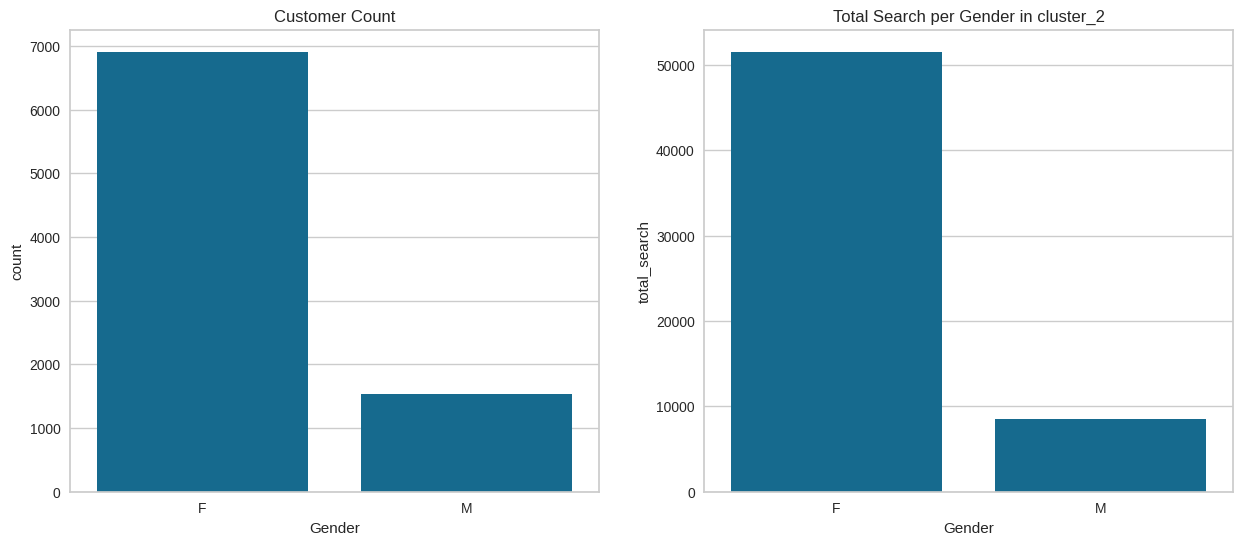

In [ ]:
# analysing CLUSTER - 2

cl_2 = cl_df.groupby(['cluster','Gender'],as_index=False).sum().query('cluster==2')

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=cl_df.query('cluster==2'),x='Gender')
plt.title('Customer Count')

plt.subplot(1,2,2)
sns.barplot(data=cl_2,x='Gender',y='total_search')
plt.title('Total Search per Gender in cluster_2')
plt.show()

In [ ]:
f_df=cl_df.groupby(['cluster'],as_index=False).sum()
f_df

,cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total_search
0,0,182944741,FFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFMFMMMFFFFFFF...,7560,3071,2724,2521,1825,1707,1642,...,3324,4369,1979,930,709,2346,1339,1030,918,81477
1,1,139225430,MMFMFFFFMFMMFFMFMFMFFFMFMFMMFFFFFFFFFFFFFFFFFF...,79885,2508,2495,2121,1579,1359,1296,...,2525,3537,1477,695,507,1791,1094,836,608,64573
2,2,127844829,FFFFFFFFFFMMFMFMFFFFFFFFFFFFMFFFMFFFFFFFFFMFFF...,37649,2444,2351,2046,1436,1240,1255,...,2285,3196,1313,705,504,1629,1058,775,601,60093


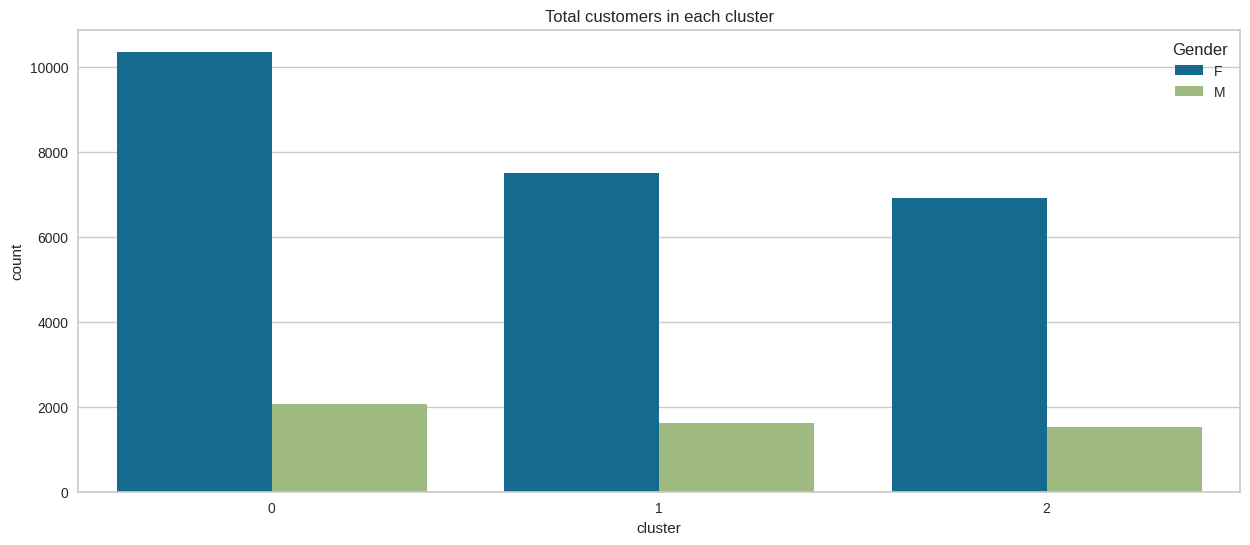

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=cl_df,x='cluster',hue='Gender')
plt.title('Total customers in each cluster')
plt.show()

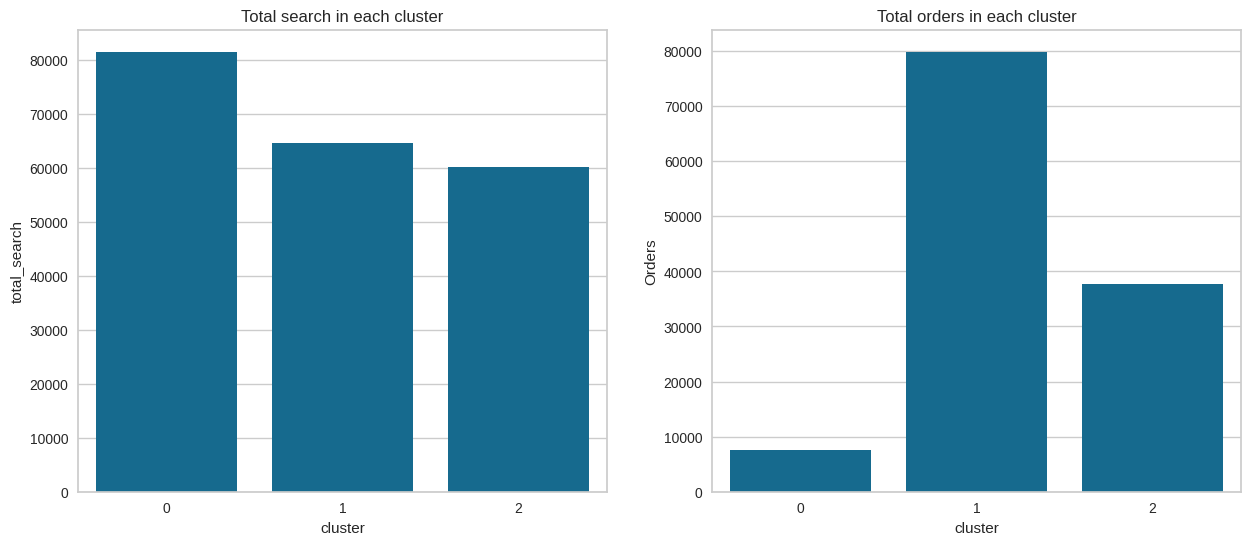

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=f_df,x='cluster',y='total_search')
plt.title('Total search in each cluster')

plt.subplot(1,2,2)
sns.barplot(data=f_df,x='cluster',y='Orders')
plt.title('Total orders in each cluster')
plt.show()

In [ ]:
'''
cluster 1 shows most orders
cluster 0 shows most searches but least orders
'''